In [1]:
import numpy as np
import pandas as pd
import math

1.1

In [2]:
families = np.array([3, 2, 5, 4, 6, 5, 3, 2, 4, 3, 4, 2, 3, 2, 5, 2, 3, 4, 2, 5, 7, 6])

# Получение уникальных значений и их частот
unique_values, counts = np.unique(families, return_counts=True)

# Сортировка уникальных значений
sorted_unique_values = np.sort(unique_values)

# Вывод вариационного ряда с частотами
print("Вариационный ряд с частотами:")
for value, count in zip(sorted_unique_values, counts):
    print(f"{value}: {count}")

Вариационный ряд с частотами:
2: 6
3: 5
4: 4
5: 4
6: 2
7: 1


Характер удручает (нет).


1.2

In [3]:
ppl = np.array(
    [7.0, 6.0, 5.9, 9.4, 6.5, 7.3, 7.6, 9.3, 5.8, 7.2, 7.1, 8.3, 7.5, 6.8, 7.1, 9.2, 6.1, 8.5, 7.4, 7.8, 10.2, 9.4, 8.8,
     8.3, 7.9, 9.2, 8.9, 9.0, 8.7, 8.5])

unique_values, counts = np.unique(ppl, return_counts=True)

# Сортировка уникальных значений
sorted_unique_values = np.sort(unique_values)

ppl.size

30

Для начала выберем количество групп. Для этого можно воспользоваться формулой Стерджесса:

In [4]:
k = round(1 + 3.322 * math.log10(ppl.size))
h = round((ppl.max() - ppl.min()) / 6, 3)
h

0.733

In [5]:
intervals = [[round(ppl.min() + i * h, 3), round(ppl.min() + (i + 1) * h, 3)] for i in range(k)]
intervals[-1][1] = round(intervals[-1][1], 1)
intervals

[[5.8, 6.533],
 [6.533, 7.266],
 [7.266, 7.999],
 [7.999, 8.732],
 [8.732, 9.465],
 [9.465, 10.2]]

In [6]:
group_counts = [np.sum((ppl >= interval[0]) & (ppl <= interval[1])) for interval in intervals]
print("Непрерывный вариационный ряд (открытый и строгий):")
for i, interval in enumerate(intervals):
    print(f"{interval[0]:.1f} - {interval[1]:.1f}: {group_counts[i]}")

Непрерывный вариационный ряд (открытый и строгий):
5.8 - 6.5: 5
6.5 - 7.3: 5
7.3 - 8.0: 6
8.0 - 8.7: 5
8.7 - 9.5: 8
9.5 - 10.2: 1


In [7]:
# Закрытый и строгий вариационный ряд
closed_strict_intervals = [(interval[0], interval[1]) for interval in intervals]

# Закрытый и нестрогий вариационный ряд
closed_nonstrict_intervals = [(interval[0], interval[1]) for interval in intervals]
closed_nonstrict_intervals[0] = (ppl.min(), closed_nonstrict_intervals[0][1])
closed_nonstrict_intervals[-1] = (closed_nonstrict_intervals[-1][0], ppl.max())

# Открытый и строгий вариационный ряд
open_strict_intervals = [(interval[0] + h, interval[1] - h) for interval in intervals[1:-1]]

# Открытый и нестрогий вариационный ряд
open_nonstrict_intervals = [(interval[0] + h, interval[1] - h) for interval in intervals[1:-1]]
open_nonstrict_intervals.insert(0, (ppl.min(), intervals[0][1]))
open_nonstrict_intervals.append((intervals[-1][0], ppl.max()))

# Вывод результатов
print("Непрерывный вариационный ряд (закрытый и строгий):")
for i, interval in enumerate(closed_strict_intervals):
    print(f"{interval[0]:.1f} - {interval[1]:.1f}: {group_counts[i]}")

print("\nНепрерывный вариационный ряд (закрытый и нестрогий):")
for i, interval in enumerate(closed_nonstrict_intervals):
    print(f"{interval[0]:.1f} - {interval[1]:.1f}: {group_counts[i]}")

print("\nНепрерывный вариационный ряд (открытый и строгий):")
for i, interval in enumerate(open_strict_intervals):
    print(f"{interval[0]:.1f} - {interval[1]:.1f}: {group_counts[i + 1]}")

print("\nНепрерывный вариационный ряд (открытый и нестрогий):")
for i, interval in enumerate(open_nonstrict_intervals):
    print(f"{interval[0]:.1f} - {interval[1]:.1f}: {group_counts[i]}")


Непрерывный вариационный ряд (закрытый и строгий):
5.8 - 6.5: 5
6.5 - 7.3: 5
7.3 - 8.0: 6
8.0 - 8.7: 5
8.7 - 9.5: 8
9.5 - 10.2: 1

Непрерывный вариационный ряд (закрытый и нестрогий):
5.8 - 6.5: 5
6.5 - 7.3: 5
7.3 - 8.0: 6
8.0 - 8.7: 5
8.7 - 9.5: 8
9.5 - 10.2: 1

Непрерывный вариационный ряд (открытый и строгий):
7.3 - 6.5: 5
8.0 - 7.3: 6
8.7 - 8.0: 5
9.5 - 8.7: 8

Непрерывный вариационный ряд (открытый и нестрогий):
5.8 - 6.5: 5
7.3 - 6.5: 5
8.0 - 7.3: 6
8.7 - 8.0: 5
9.5 - 8.7: 8
9.5 - 10.2: 1


8.7 - 8.0: 5
7.3 - 6.5: 5
5.8 - 6.5: 5

1.3

In [8]:

# Данные
data = np.array([99.2, 101.2, 99.3, 105.0, 97.3, 103.2, 105.4, 108.2,
                 95.4, 96.8, 100.5, 90.3, 110.8, 111.5, 150.5, 140.3,
                 89.8, 103.6, 115.8, 125.4, 116.5, 130.4, 90.6, 130.4,
                 170.4, 109.2, 160.3, 122.4, 190.3, 202.0, 130.0, 119.6,
                 99.9, 119.4, 127.0, 130.0, 140.0, 129.0, 150.0, 168.0])

data



array([ 99.2, 101.2,  99.3, 105. ,  97.3, 103.2, 105.4, 108.2,  95.4,
        96.8, 100.5,  90.3, 110.8, 111.5, 150.5, 140.3,  89.8, 103.6,
       115.8, 125.4, 116.5, 130.4,  90.6, 130.4, 170.4, 109.2, 160.3,
       122.4, 190.3, 202. , 130. , 119.6,  99.9, 119.4, 127. , 130. ,
       140. , 129. , 150. , 168. ])

In [9]:
h = (data.max() - data.min()) / 4
h

28.05

In [10]:
intervals_4 = [[data.min() + i * h, data.min() + (i + 1) * h] for i in range(4)]
group_counts = [np.sum((data >= interval[0]) & (data <= interval[1])) for interval in intervals_4]
print("первый вариант на четверых")
for i, interval in enumerate(intervals_4):
    print(f"{interval[0]:.1f} - {interval[1]:.1f}: {group_counts[i]}")

первый вариант на четверых
89.8 - 117.8: 21
117.8 - 145.9: 12
145.9 - 173.9: 5
173.9 - 202.0: 2


In [11]:
# Разделение на две группы
group1 = data[data < 100]
group2 = data[data >= 100]
print("loosers: ", group1.size)
print("cool guys: ", group2.size)

loosers:  9
cool guys:  31


1.4

In [12]:
tarifs = np.array(
    [5, 4, 2, 1, 6, 3, 3, 4, 3, 2, 2, 5, 6, 4, 3, 5, 4, 1, 2, 3, 3, 4, 1, 6, 5, 1, 3, 4, 3, 5, 4, 3, 3, 4, 4, 6, 4, 4,
     3, 1, 5, 4, 3, 2, 6, 3, 4, 5, 5, 3, 3, 3, 3, 4, 5, 5, 6, 2, 4])
max_value = tarifs.max()
min_value = tarifs.min()
h = round((max_value - min_value)/3)

In [13]:
# Получение уникальных значений и их частот
unique_values, counts = np.unique(tarifs, return_counts=True)
print(unique_values)
# Сортировка уникальных значений
sorted_unique_values = np.sort(unique_values)

# Вывод вариационного ряда с частотами
print("Вариационный ряд с частотами:")
for value, count in zip(sorted_unique_values, counts):
    print(f"{value}: {count}")

[1 2 3 4 5 6]
Вариационный ряд с частотами:
1: 5
2: 6
3: 17
4: 15
5: 10
6: 6


In [14]:
intervals = [[min_value+i*h, min_value + (i+1)*h] for i in range(3)]
groups = [np.sum((tarifs >= interval[0])&(tarifs < interval[1])) for interval in intervals]
for i, interval in enumerate(intervals):
    print(f"{interval[0]:.1f} - {interval[1]:.1f}: {group_counts[i]}")

1.0 - 3.0: 21
3.0 - 5.0: 12
5.0 - 7.0: 5


1.5

In [15]:

data = {
    'Номер предприятия': [i for i in range(1, 26)],
    'Среднегодовой объем выпускаемой продукции, тыс. руб.': [4010, 3016, 1950, 4100, 3116, 3266, 2100, 2986, 2160, 3110, 2040, 2540, 3403, 2500, 3146, 2130, 3236, 2866, 3146, 2250, 2610, 2270, 2420, 3760, 4210],
    'Среднее списочное число рабочих, чел.': [4270, 4250, 2850, 4750, 3550, 3900, 2850, 3650, 2750, 3200, 2150, 3150, 3750, 3150, 3550, 3150, 3650, 2950, 3350, 2750, 3150, 2350, 2250, 4150, 4850],
    'Количество посещений больниц в связи с травмами': [937, 702, 389, 987, 632, 665, 338, 572, 368, 484, 305, 527, 660, 502, 582, 580, 690, 427, 528, 380, 648, 4072, 416, 810, 907]
}
df = pd.DataFrame(data)

min_value = df['Среднегодовой объем выпускаемой продукции, тыс. руб.'].min()
max_value = df['Среднегодовой объем выпускаемой продукции, тыс. руб.'].max()
interval = (max_value - min_value)/5

In [16]:
def define_group(value):
    for i in range(1, 6):
        if min_value + interval * (i - 1) <= value <= min_value + interval * i:
            return i
        
df['Группа'] = df['Среднегодовой объем выпускаемой продукции, тыс. руб.'].apply(define_group)
# Группируем данные по номеру группы и вычисляем необходимые показатели
grouped_df = df.groupby('Группа').agg({'Номер предприятия': 'count',
                                        'Среднегодовой объем выпускаемой продукции, тыс. руб.': 'sum',
                                        'Среднее списочное число рабочих, чел.': 'sum',
                                        'Количество посещений больниц в связи с травмами': 'sum'})

# Выводим результат
print(grouped_df)

        Номер предприятия  \
Группа                      
1                       7   
2                       4   
3                       9   
4                       1   
5                       4   

        Среднегодовой объем выпускаемой продукции, тыс. руб.  \
Группа                                                         
1                                                   14900      
2                                                   10070      
3                                                   27888      
4                                                    3403      
5                                                   16080      

        Среднее списочное число рабочих, чел.  \
Группа                                          
1                                       18850   
2                                       11700   
3                                       32050   
4                                        3750   
5                                       18020   

   

2.1

In [17]:
data = {
    'Этажность': [i for i in range(1, 11)],  # Предполагаем, что анализируем здания до 10 этажей
    'Число строений': [0] * 10,
    'Жилая площадь, м²': [0] * 10,
    'Число проживающих': [0] * 10,
    'Полностью заселено': [0] * 10
}
df = pd.DataFrame(data)

# Пример заполнения данными (замените эти значения на реальные)
# Предположим, что для каждого этажа у нас есть данные о количестве строений, площади, численности и заселенности
# Здесь приведены случайные данные для иллюстрации
df['Число строений'] = [5, 7, 3, 4, 6, 2, 1, 3, 2, 1]
df['Жилая площадь, м²'] = [500, 600, 400, 450, 550, 350, 200, 400, 300, 150]
df['Число проживающих'] = [15, 20, 10, 12, 18, 8, 5, 10, 7, 3]
df['Полностью заселено'] = [3, 5, 2, 2, 4, 1, 1, 2, 1, 0]

# Выводим результат
print(df)

   Этажность  Число строений  Жилая площадь, м²  Число проживающих  \
0          1               5                500                 15   
1          2               7                600                 20   
2          3               3                400                 10   
3          4               4                450                 12   
4          5               6                550                 18   
5          6               2                350                  8   
6          7               1                200                  5   
7          8               3                400                 10   
8          9               2                300                  7   
9         10               1                150                  3   

   Полностью заселено  
0                   3  
1                   5  
2                   2  
3                   2  
4                   4  
5                   1  
6                   1  
7                   2  
8            

2.3

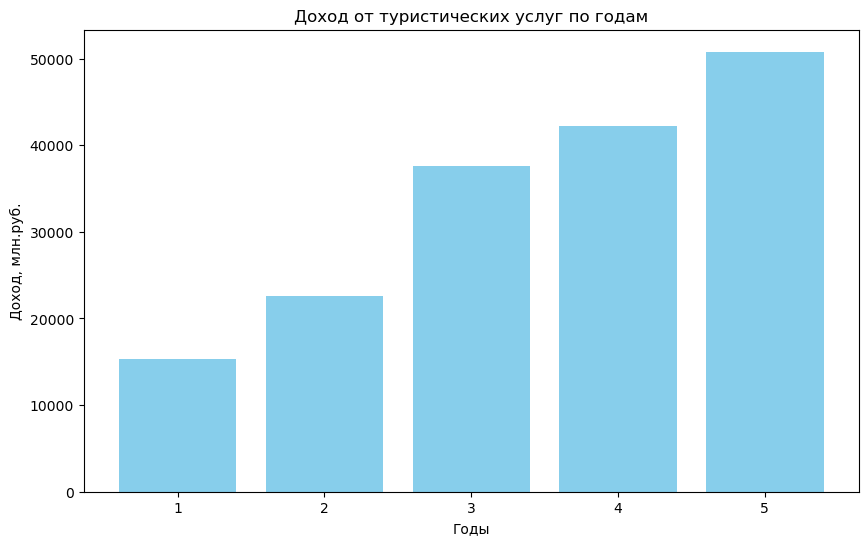

In [18]:
import matplotlib.pyplot as plt

# Данные
years = [1, 2, 3, 4, 5]
income = [15317, 22620, 37593, 42245, 50789]

# Создание графика столбиковой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(years, income, color='skyblue')

# Добавление заголовка и меток осей
plt.title('Доход от туристических услуг по годам')
plt.xlabel('Годы')
plt.ylabel('Доход, млн.руб.')

# Отображение графика
plt.show()


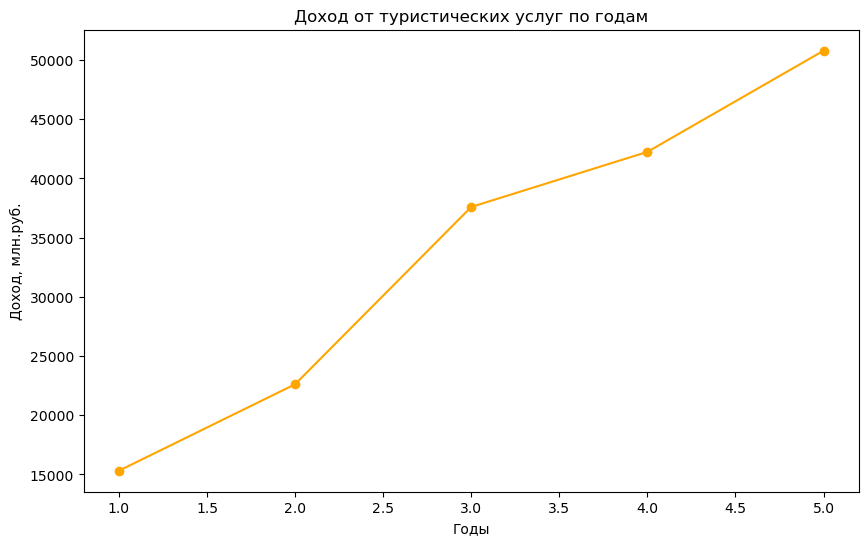

In [19]:
# Создание графика ленточной диаграммы
plt.figure(figsize=(10, 6))
plt.plot(years, income, marker='o', color='orange', linestyle='-')

# Добавление заголовка и меток осей
plt.title('Доход от туристических услуг по годам')
plt.xlabel('Годы')
plt.ylabel('Доход, млн.руб.')

# Отображение графика
plt.show()


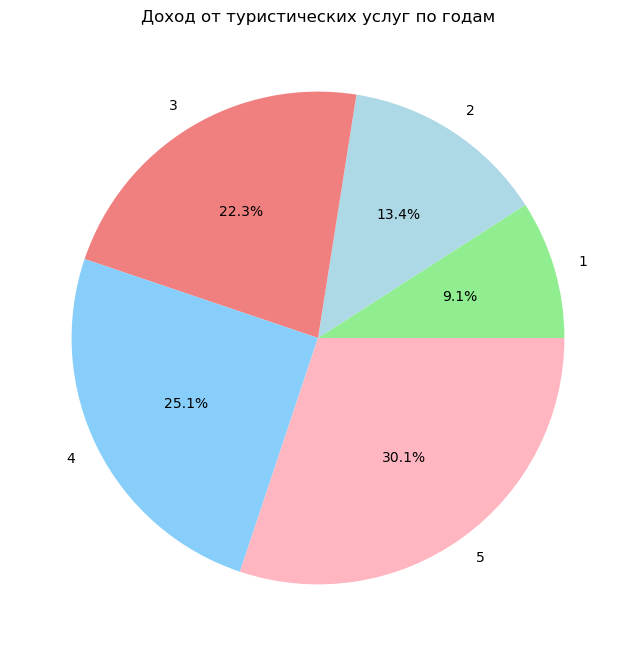

In [20]:
# Создание графика квадратной диаграммы
plt.figure(figsize=(8, 8))
plt.pie(income, labels=years, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightskyblue', 'lightpink'])

# Добавление заголовка
plt.title('Доход от туристических услуг по годам')

# Отображение графика
plt.show()


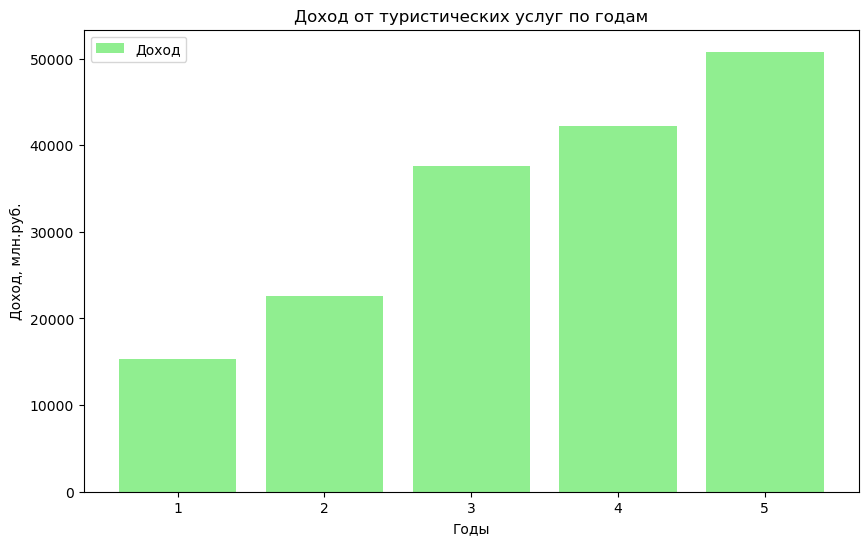

In [21]:
# Создание групповой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(years, income, color='lightgreen', label='Доход')

# Добавление заголовка и меток осей
plt.title('Доход от туристических услуг по годам')
plt.xlabel('Годы')
plt.ylabel('Доход, млн.руб.')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()


2.4

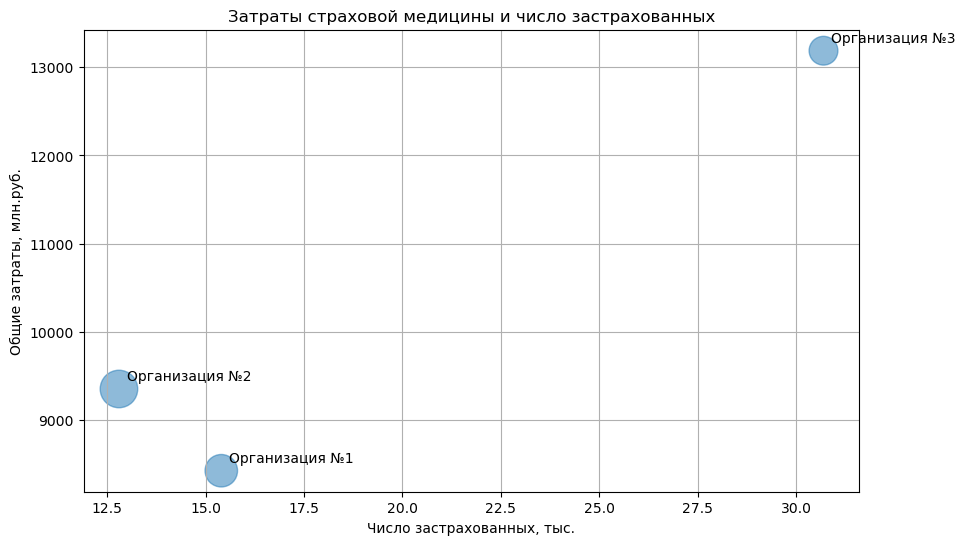

In [22]:
organizations = ['Организация №1', 'Организация №2', 'Организация №3']
total_costs = [8428.42, 9354.24, 13185.65]
insured_people = [15.40, 12.80, 30.70]
average_costs_per_person = [547.30, 730.80, 429.50]

# Создание диаграммы с знаком Варзара
plt.figure(figsize=(10, 6))
plt.scatter(insured_people, total_costs, s=average_costs_per_person, alpha=0.5)

# Добавление меток к точкам
for i in range(len(organizations)):
    plt.text(insured_people[i] + 0.2, total_costs[i] + 100, organizations[i])

# Добавление заголовка и меток осей
plt.title('Затраты страховой медицины и число застрахованных')
plt.xlabel('Число застрахованных, тыс.')
plt.ylabel('Общие затраты, млн.руб.')

# Отображение графика
plt.grid(True)
plt.show()

2.5

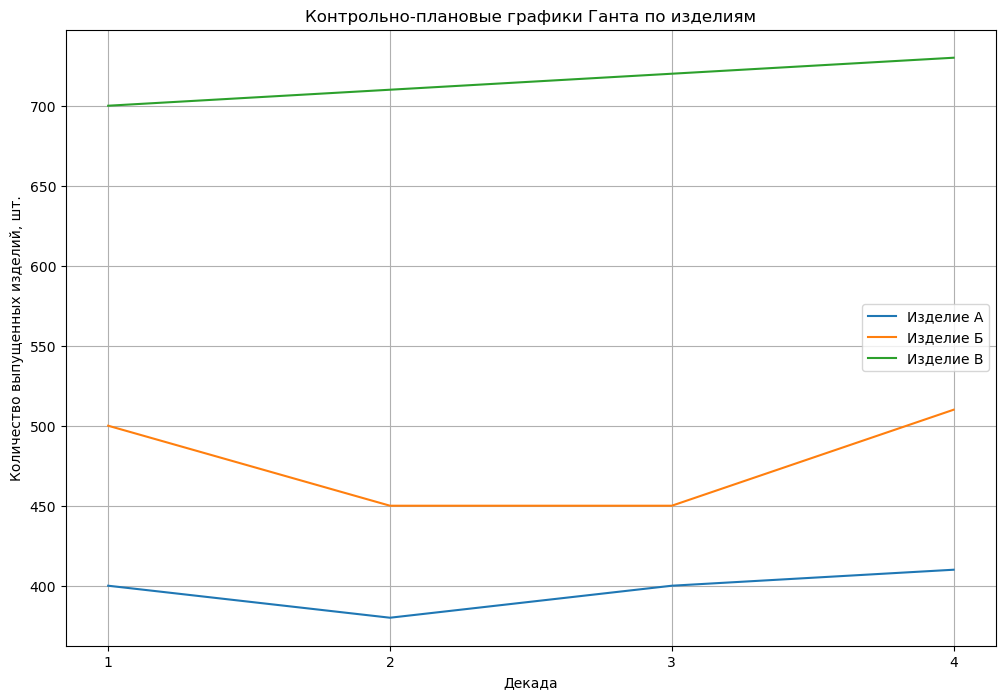

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
products = ['А', 'Б', 'В']
planned_production = np.array([[400, 380, 400, 410],
                               [500, 450, 450, 510],
                               [700, 710, 720, 730]])

# Создание контрольно-плановых графиков Ганта
plt.figure(figsize=(12, 8))

# График для каждого изделия
for i, product in enumerate(products):
    plt.plot(planned_production[i], label=f'Изделие {product}')

# Добавление меток осей и заголовка
plt.title('Контрольно-плановые графики Ганта по изделиям')
plt.xlabel('Декада')
plt.ylabel('Количество выпущенных изделий, шт.')
plt.xticks(np.arange(4), ['1', '2', '3', '4'])

# Добавление легенды
plt.legend()

# Отображение графика
plt.grid(True)
plt.show()


2.6

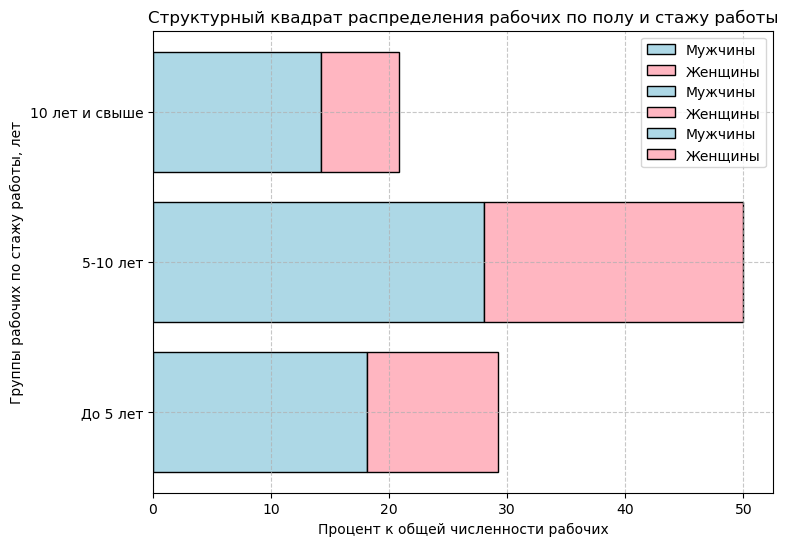

In [24]:
# Данные
groups = ['До 5 лет', '5-10 лет', '10 лет и свыше']
men_percent = [18.10, 28.00, 14.20]
women_percent = [11.10, 22.00, 6.60]

# Создание структурного квадрата
fig, ax = plt.subplots(figsize=(8, 6))

# Рисуем прямоугольники для мужчин и женщин
for i, group in enumerate(groups):
    ax.barh(group, men_percent[i], color='lightblue', label='Мужчины', edgecolor='black')
    ax.barh(group, women_percent[i], left=men_percent[i], color='lightpink', label='Женщины', edgecolor='black')

# Добавление заголовка и меток осей
ax.set_title('Структурный квадрат распределения рабочих по полу и стажу работы')
ax.set_xlabel('Процент к общей численности рабочих')
ax.set_ylabel('Группы рабочих по стажу работы, лет')

# Добавление легенды
ax.legend()

# Отображение графика
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

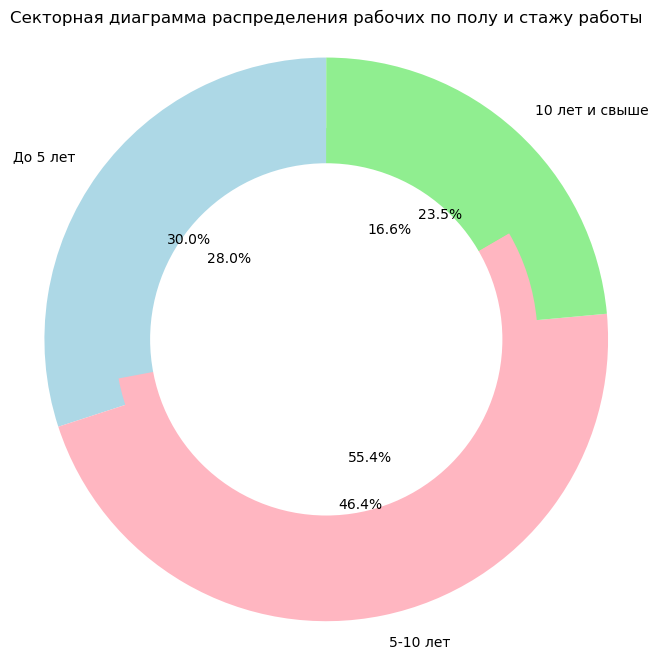

In [25]:
# Создание секторной диаграммы
plt.figure(figsize=(8, 8))

# Срезы для мужчин и женщин
men_slices = [18.10, 28.00, 14.20]
women_slices = [11.10, 22.00, 6.60]

# Метки для секторов
labels = ['До 5 лет', '5-10 лет', '10 лет и свыше']

# Цвета для секторов
colors = ['lightblue', 'lightpink', 'lightgreen']

# Создание секторов для мужчин и женщин
plt.pie(men_slices, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', radius=0.8)
plt.pie(women_slices, colors=colors, startangle=90, autopct='%1.1f%%', radius=0.6)

# Добавление круга в середину для создания "дырки"
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Добавление заголовка
plt.title('Секторная диаграмма распределения рабочих по полу и стажу работы')

# Отображение диаграммы
plt.axis('equal')
plt.show()


3.1

In [26]:
# Данные
workload_team1 = [70, 73, 68, 75, 75]
workload_team2 = [74, 83, 81, 100, 73]

# Рассчитываем среднее дневное число деталей для каждой бригады
average_team1 = sum(workload_team1) / len(workload_team1)
average_team2 = sum(workload_team2) / len(workload_team2)

# Рассчитываем среднее дневное число деталей по двум бригадам
average_total = (sum(workload_team1) + sum(workload_team2)) / (len(workload_team1) + len(workload_team2))

# Выводим результат
print(f"Среднее дневное число деталей для первой бригады: {average_team1:.2f}")
print(f"Среднее дневное число деталей для второй бригады: {average_team2:.2f}")
print(f"Среднее дневное число деталей по обеим бригадам: {average_total:.2f}")


Среднее дневное число деталей для первой бригады: 72.20
Среднее дневное число деталей для второй бригады: 82.20
Среднее дневное число деталей по обеим бригадам: 77.20


3.2

In [27]:
# Данные
weights_men = [52.3, 66.4, 33.8]  # Удельный вес мужчин в цехах, процент к итогу
total_workers = [31.6, 25.8, 42.6]  # Общее число рабочих в цехах, процент к итогу

# Вычисление удельного веса мужчин в общей численности рабочих предприятия
total_men_percentage = sum(weight * worker / 100 for weight, worker in zip(weights_men, total_workers))

# Вывод результата
print(f"Удельный вес мужчин в общей численности рабочих предприятия: {total_men_percentage:.2f}%")


Удельный вес мужчин в общей численности рабочих предприятия: 48.06%


3.3

In [28]:
# Данные
defect_percentage = [0.8, 1.2, 0.5]  # Процент брака в цехах, %
production_cost = [125.9, 154.3, 200.8]  # Стоимость продукции в цехах, тыс. руб.

# Вычисление среднего процента брака во всей производственной продукции предприятия
total_defect_percentage = sum(defect * cost for defect, cost in zip(defect_percentage, production_cost)) / sum(production_cost)

# Вывод результата
print(f"Средний процент брака во всей производственной продукции предприятия: {total_defect_percentage:.2f}%")


Средний процент брака во всей производственной продукции предприятия: 0.80%


3.4

In [29]:
# Данные
tourist_groups = ['1800-2000', '2000-2200', '2200-2400', '2400-2600', '2600-2800', '2800-3000', '3000-3200']
hotel_percentages = [7.3, 10.4, 12.2, 25.5, 22.4, 14.6, 7.6]

# Преобразуем группы гостиниц в середины интервалов
midpoints = [(int(group.split('-')[0]) + int(group.split('-')[1])) / 2 for group in tourist_groups]

# Вычисляем среднее число туристов методом условного нуля (методом моментов)
average_tourists = sum(midpoint * percentage / 100 for midpoint, percentage in zip(midpoints, hotel_percentages))

# Вывод результата
print(f"Среднее число туристов, обслуживаемых гостиницами в месяц: {average_tourists:.2f}")


Среднее число туристов, обслуживаемых гостиницами в месяц: 2539.00


3.5

In [30]:
# Данные
average_salaries = [1100, 1230, 1150, 1350]  # Средняя ЗП в цехах, руб.
wage_funds = [20, 30, 10, 40]  # ФОТ в цехах, % к итогу

# Вычисление средней ЗП работающих в целом по предприятию
total_wage = sum(salary * fund / 100 for salary, fund in zip(average_salaries, wage_funds))

# Вывод результата
print(f"Средняя ЗП работающих в целом по предприятию: {total_wage:.2f} руб.")


Средняя ЗП работающих в целом по предприятию: 1244.00 руб.


4.1

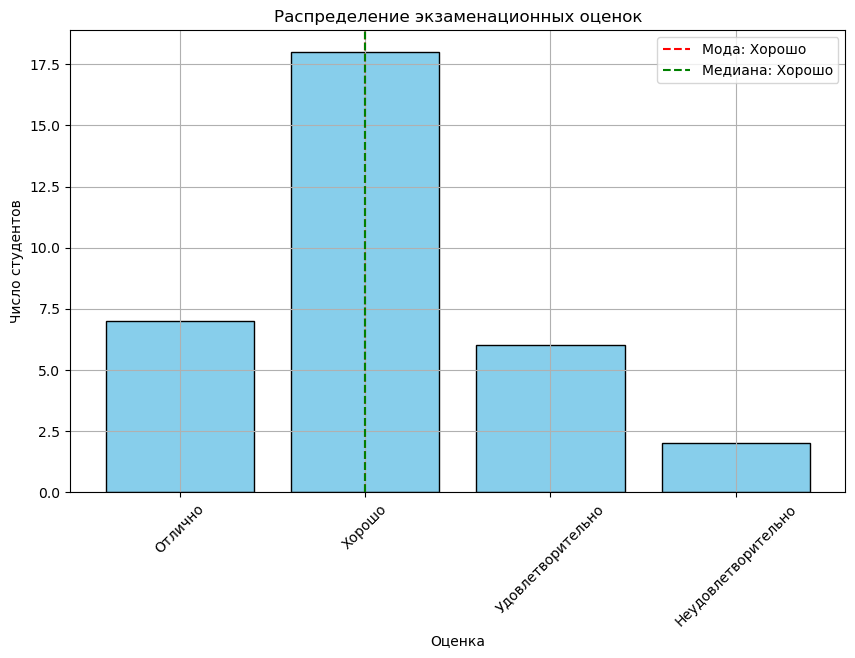

In [31]:


# Данные
grades = ['Отлично', 'Хорошо', 'Удовлетворительно', 'Неудовлетворительно']
students_count = [7, 18, 6, 2]

# Определение моды (максимальное количество студентов)
mode_index = np.argmax(students_count)
mode = grades[mode_index]

# Определение медианы
total_students = sum(students_count)
cumulative_count = np.cumsum(students_count)
median_index = np.searchsorted(cumulative_count, total_students / 2)
median = grades[median_index]

# Графическое представление
plt.figure(figsize=(10, 6))
plt.bar(grades, students_count, color='skyblue', edgecolor='black')
plt.xlabel('Оценка')
plt.ylabel('Число студентов')
plt.title('Распределение экзаменационных оценок')
plt.axvline(x=mode, color='red', linestyle='--', label=f'Мода: {mode}')
plt.axvline(x=median, color='green', linestyle='--', label=f'Медиана: {median}')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


4.2

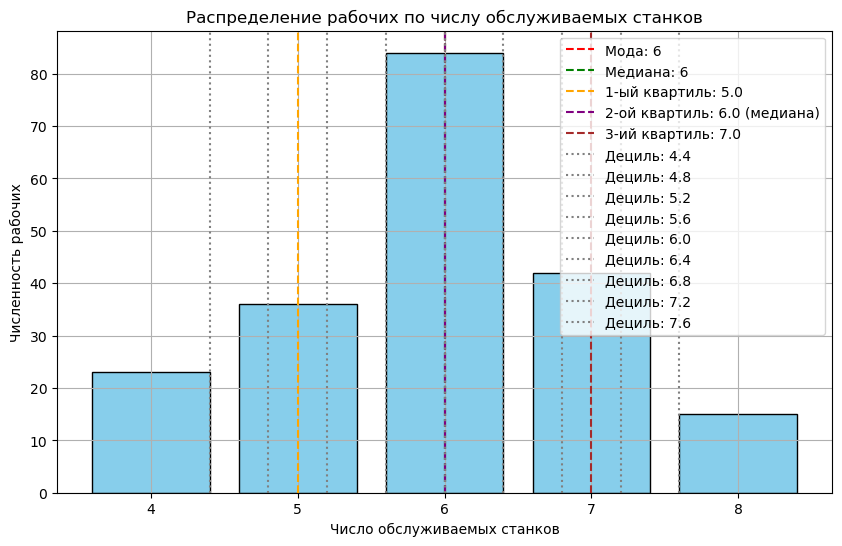

Мода: 6
Медиана: 6
1-ый квартиль: 5.0
2-ой квартиль (медиана): 6.0
3-ий квартиль: 7.0
1-ый дециль: 4.4
2-ый дециль: 4.8
3-ый дециль: 5.2
4-ый дециль: 5.6
5-ый дециль: 6.0
6-ый дециль: 6.4
7-ый дециль: 6.8
8-ый дециль: 7.2
9-ый дециль: 7.6


In [33]:


# Данные
number_of_machines = [4, 5, 6, 7, 8]
workers_count = [23, 36, 84, 42, 15]

# Вычисление моды
mode_index = np.argmax(workers_count)
mode = number_of_machines[mode_index]

# Вычисление медианы
cumulative_count = np.cumsum(workers_count)
median_index = np.searchsorted(cumulative_count, sum(workers_count) / 2)
median = number_of_machines[median_index]

# Вычисление квартилей
quartiles = np.percentile(number_of_machines, [25, 50, 75])

# Вычисление децилей
deciles = np.percentile(number_of_machines, np.arange(10, 100, 10))

# Графическое представление
plt.figure(figsize=(10, 6))
plt.bar(number_of_machines, workers_count, color='skyblue', edgecolor='black')
plt.xlabel('Число обслуживаемых станков')
plt.ylabel('Численность рабочих')
plt.title('Распределение рабочих по числу обслуживаемых станков')
plt.axvline(x=mode, color='red', linestyle='--', label=f'Мода: {mode}')
plt.axvline(x=median, color='green', linestyle='--', label=f'Медиана: {median}')
plt.axvline(x=quartiles[0], color='orange', linestyle='--', label=f'1-ый квартиль: {quartiles[0]}')
plt.axvline(x=quartiles[1], color='purple', linestyle='--', label=f'2-ой квартиль: {quartiles[1]} (медиана)')
plt.axvline(x=quartiles[2], color='brown', linestyle='--', label=f'3-ий квартиль: {quartiles[2]}')
for decile in deciles:
    plt.axvline(x=decile, color='gray', linestyle=':', label=f'Дециль: {decile}')
plt.legend()
plt.grid(True)
plt.xticks(number_of_machines)
plt.show()

# Вывод результатов
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"1-ый квартиль: {quartiles[0]}")
print(f"2-ой квартиль (медиана): {quartiles[1]}")
print(f"3-ий квартиль: {quartiles[2]}")
for i, decile in enumerate(deciles, start=1):
    print(f"{i}-ый дециль: {decile}")


4.3

In [35]:
# Обновленные данные с числовыми значениями возрастных диапазонов
age_ranges_numeric = [12.5, 30, 40, 47.5, 52.5, 57.5, 65]

# Функция для вычисления статистических показателей
def calculate_statistics(data):
    # Вычисление моды
    mode_index = np.argmax(data)
    mode = age_ranges_numeric[mode_index]

    # Вычисление медианы
    cumulative_count = np.cumsum(data)
    median_index = np.searchsorted(cumulative_count, np.sum(data) / 2)
    median = age_ranges_numeric[median_index]

    # Вычисление квартилей
    quartiles = np.percentile(age_ranges_numeric, [25, 50, 75])

    # Вычисление децилей
    deciles = np.percentile(age_ranges_numeric, np.arange(10, 100, 10))

    return mode, median, quartiles, deciles

# Вывод результатов для каждой отрасли
for industry, data in zip(industries, workers_percentages):
    mode, median, quartiles, deciles = calculate_statistics(data)
    print(f"Отрасль: {industry}")
    print(f"Мода: {mode}")
    print(f"Медиана: {median}")
    print(f"1-ый квартиль: {quartiles[0]}")
    print(f"2-ой квартиль (медиана): {quartiles[1]}")
    print(f"3-ий квартиль: {quartiles[2]}")
    for i, decile in enumerate(deciles, start=1):
        print(f"{i}-ый дециль: {decile}")
    print()


Отрасль: Промышленность
Мода: 40
Медиана: 40
1-ый квартиль: 35.0
2-ой квартиль (медиана): 47.5
3-ий квартиль: 55.0
1-ый дециль: 23.0
2-ый дециль: 32.0
3-ый дециль: 38.0
4-ый дециль: 43.0
5-ый дециль: 47.5
6-ый дециль: 50.5
7-ый дециль: 53.5
8-ый дециль: 56.5
9-ый дециль: 60.5

Отрасль: Сфера услуг
Мода: 30
Медиана: 40
1-ый квартиль: 35.0
2-ой квартиль (медиана): 47.5
3-ий квартиль: 55.0
1-ый дециль: 23.0
2-ый дециль: 32.0
3-ый дециль: 38.0
4-ый дециль: 43.0
5-ый дециль: 47.5
6-ый дециль: 50.5
7-ый дециль: 53.5
8-ый дециль: 56.5
9-ый дециль: 60.5

Отрасль: Медицина
Мода: 47.5
Медиана: 47.5
1-ый квартиль: 35.0
2-ой квартиль (медиана): 47.5
3-ий квартиль: 55.0
1-ый дециль: 23.0
2-ый дециль: 32.0
3-ый дециль: 38.0
4-ый дециль: 43.0
5-ый дециль: 47.5
6-ый дециль: 50.5
7-ый дециль: 53.5
8-ый дециль: 56.5
9-ый дециль: 60.5


4.4

In [37]:
import numpy as np

# Данные
route_lengths = ['До 8', '8-10', '10-12', '12-14', '14-16', '16-18', 'Свыше 18']
percentages = [3.0, 12.8, 15.2, 15.3, 38.0, 10.4, 5.3]

# Преобразование категорий длины маршрута в числовые значения
route_lengths_numeric = [4, 9, 11, 13, 15, 17, 20]

# Функция для вычисления статистических показателей
def calculate_statistics(data):
    # Вычисление моды
    mode_index = np.argmax(data)
    mode = route_lengths_numeric[mode_index]

    # Вычисление медианы
    cumulative_count = np.cumsum(data)
    median_index = np.searchsorted(cumulative_count, np.sum(data) / 2)
    median = route_lengths_numeric[median_index]

    # Вычисление квартилей
    quartiles = np.percentile(route_lengths_numeric, [25, 50, 75])

    # Вычисление децилей
    deciles = np.percentile(route_lengths_numeric, np.arange(10, 100, 10))

    return mode, median, quartiles, deciles

# Вывод результатов
mode, median, quartiles, deciles = calculate_statistics(percentages)
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"1-ый квартиль: {quartiles[0]}")
print(f"2-ой квартиль (медиана): {quartiles[1]}")
print(f"3-ий квартиль: {quartiles[2]}")
for i, decile in enumerate(deciles, start=1):
    print(f"{i}-ый дециль: {decile}")


Мода: 15
Медиана: 15
1-ый квартиль: 10.0
2-ой квартиль (медиана): 13.0
3-ий квартиль: 16.0
1-ый дециль: 7.0
2-ый дециль: 9.4
3-ый дециль: 10.6
4-ый дециль: 11.8
5-ый дециль: 13.0
6-ый дециль: 14.2
7-ый дециль: 15.399999999999999
8-ый дециль: 16.6
9-ый дециль: 18.200000000000003
